In [1]:
# importing data libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/hotel_bookings.csv')
data_train = data.copy()

In [3]:
data.shape

(119390, 32)

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# fill pd.NaN values to np.nan

data = data.fillna(np.nan)

In [9]:
# nan values

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

nan_cols = pd.concat([total, percent], axis=1, keys=['Total', 'nan'])

nan_cols[nan_cols['nan'] > 0]

,Total,nan
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034


## Data Analysis and Visualizations:

In [10]:
# seaborn initial settings

sns.set(context='notebook', palette='Set1', style='whitegrid', rc={'figure.figsize':(16, 8)})

### 1 - hotel:
    
    - hotel name info.

In [11]:
data['hotel'].isna().sum()

0

In [12]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Text(0.5, 1.0, 'Hotels')

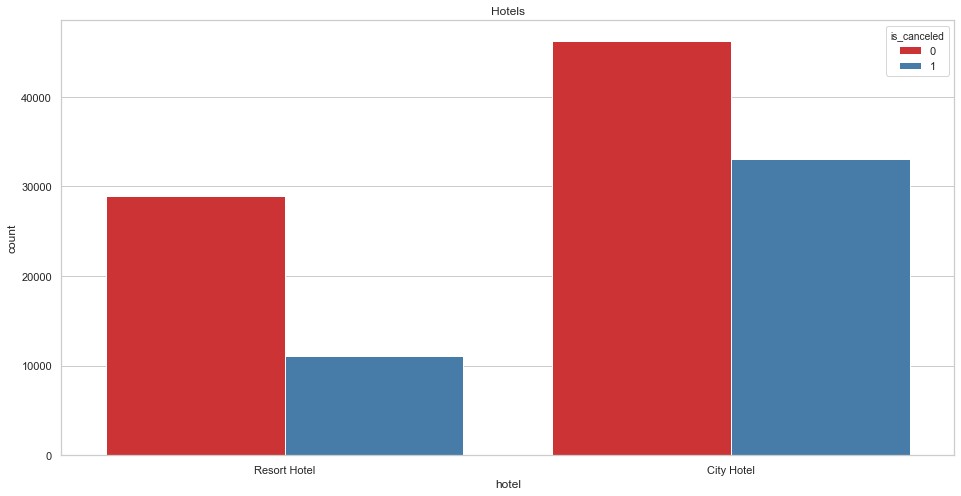

In [13]:
g = sns.countplot(x='hotel', hue='is_canceled', data=data)

g.set_title("Hotels")

In [14]:
data.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

* City hotel has more bookings and canceled bookings. 

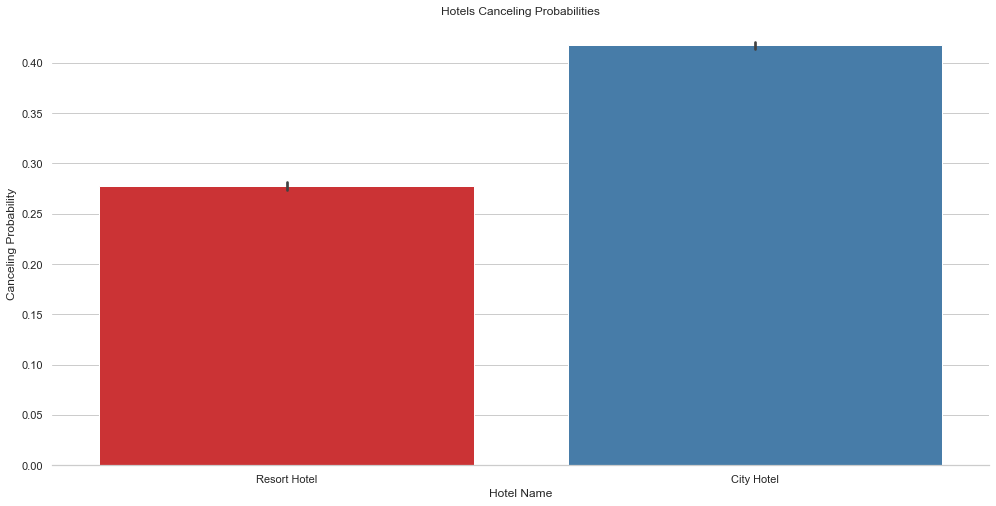

In [15]:
g = sns.catplot(x='hotel', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True) # removes axis line. Here removes y axis line.

g.set(xlabel='Hotel Name', ylabel='Canceling Probability', title="Hotels Canceling Probabilities")

* If the booking belongs to City Hotel it is more likely be canceled. 

In [16]:
## convert hotel names to dummy variables.

data_train = pd.get_dummies(data_train, columns=['hotel'], prefix='', prefix_sep='', drop_first=True)

In [17]:
data_train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


### 2 - lead_time:

    - lead time each customers in mins.

In [18]:
data['lead_time'].isna().sum()

0

In [19]:
data['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

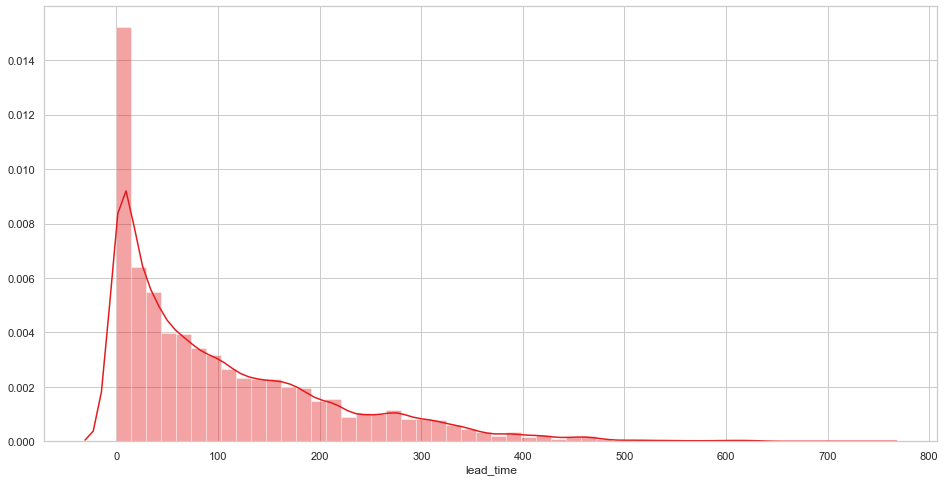

In [20]:
g = sns.distplot(a=data['lead_time'], label='lead_time_distribution')

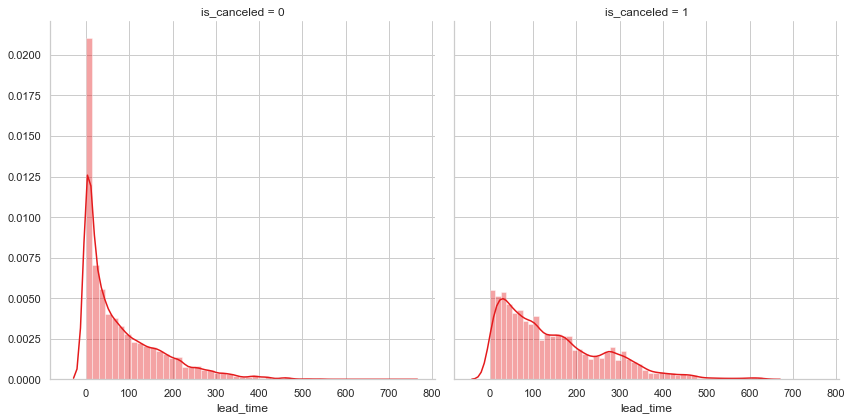

In [21]:
# lead_time vs canceled

g = sns.FacetGrid(data, col='is_canceled', height=6)
g = g.map(sns.distplot, 'lead_time')


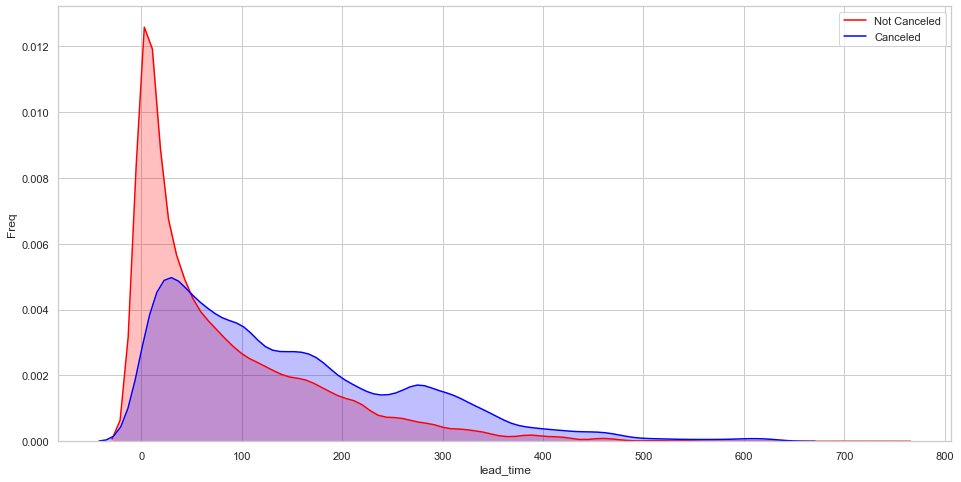

In [22]:
# lead_time dist vs is_canceled

g = sns.kdeplot(data['lead_time'][data['is_canceled'] == 0],
               color='Red', shade=True)

g = sns.kdeplot(data['lead_time'][data['is_canceled'] == 1],
               color='Blue', shade=True)

g.set_xlabel('lead_time')
g.set_ylabel('Freq')

g = g.legend(['Not Canceled', 'Canceled'])

In [23]:
data['lead_time'].min(), data['lead_time'].mean(), data['lead_time'].max()

(0, 104.01141636652986, 737)

In [24]:
data['lead_time_hour'] = data['lead_time'] // 60

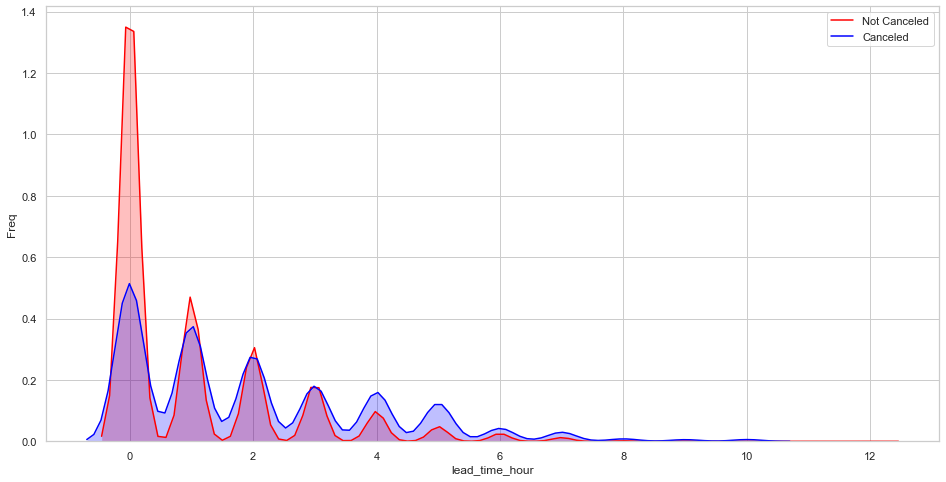

In [25]:
# after converting mins to hours

g = sns.kdeplot(data['lead_time_hour'][data['is_canceled'] == 0],
               color='Red', shade=True)

g = sns.kdeplot(data['lead_time_hour'][data['is_canceled'] == 1],
               color='Blue', shade=True)

g.set_xlabel('lead_time_hour')
g.set_ylabel('Freq')

g = g.legend(['Not Canceled', 'Canceled'])

In [26]:
data['lead_time_hour'].value_counts()

0     55240
1     23201
2     15987
3     10095
4      6887
5      4537
6      1794
7      1098
8       245
9       159
10      145
12        1
11        1
Name: lead_time_hour, dtype: int64

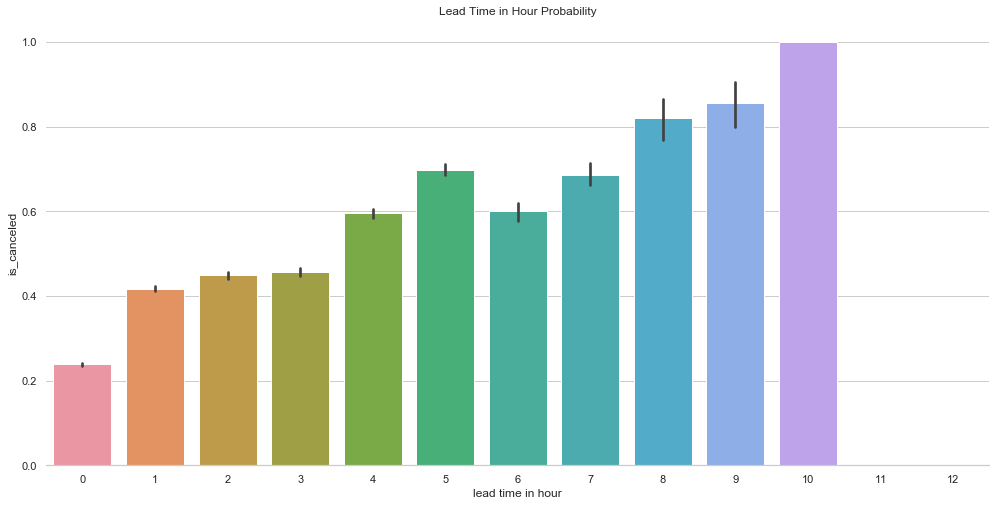

In [27]:
g = sns.catplot(x='lead_time_hour', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(xlabel='lead time in hour', ylabel='is_canceled', title="Lead Time in Hour Probability")

* Clearly we can see that increasing lead_time increases canceling probability.

### 3 - arrival_date_year:

In [28]:
data['arrival_date_year'].isna().sum()

0

In [29]:
data['arrival_date_year'].describe()

count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64

In [30]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [31]:
data['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Years')

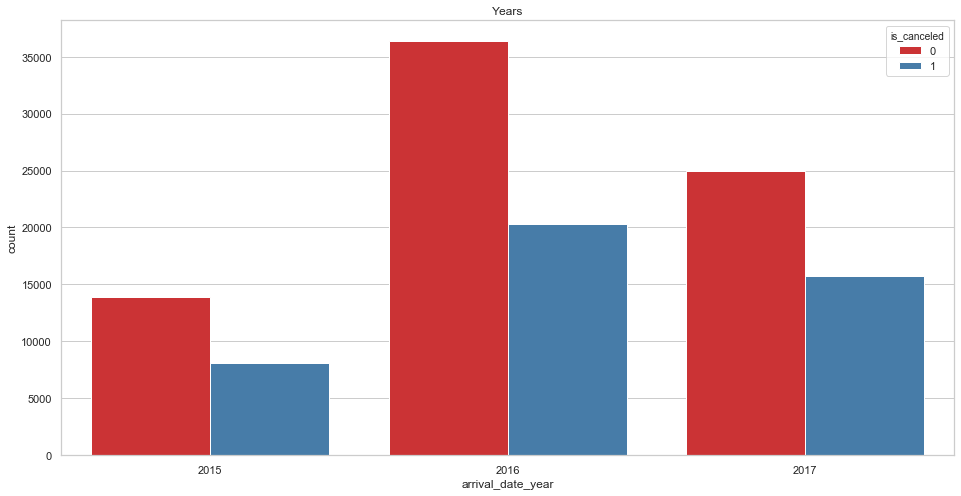

In [32]:
g = sns.countplot(x='arrival_date_year', hue='is_canceled', data=data)

g.set_title("Years")

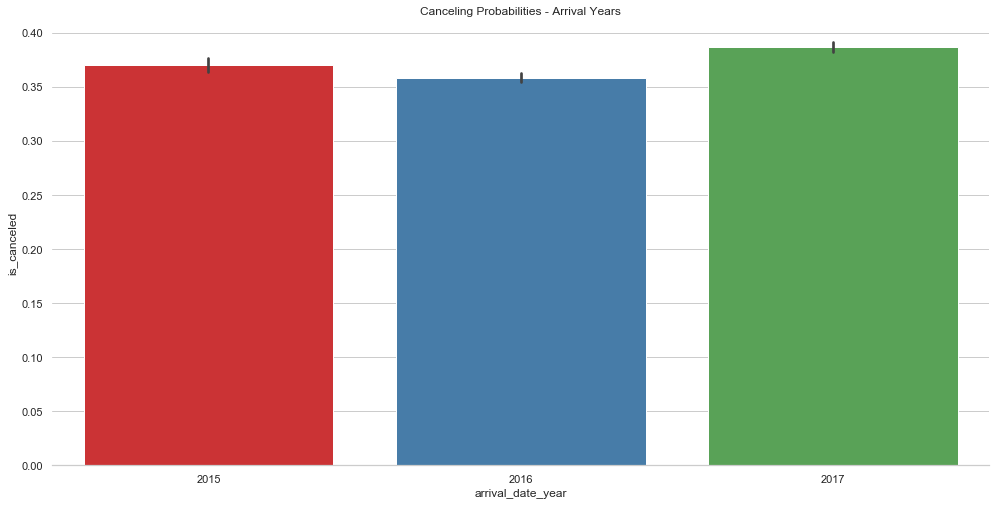

In [33]:
g = sns.catplot(x='arrival_date_year', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Years')

- 2015 - 2016 - 2017 have similar canceling probabilities.

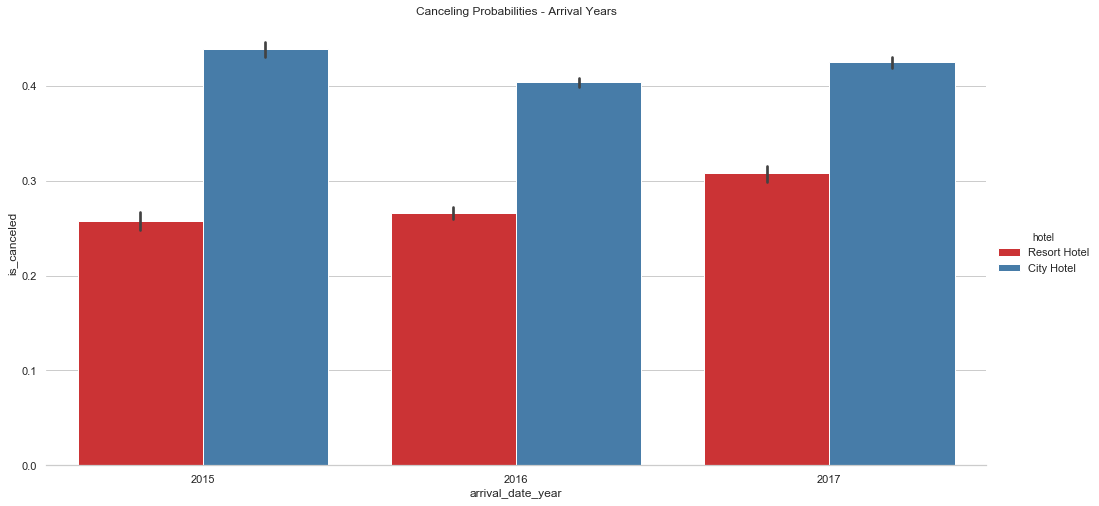

In [34]:
g = sns.catplot(x='arrival_date_year', y='is_canceled', hue='hotel', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Years')

- In the each year canceling probability higher for Ciy Hotel.

In [35]:
# get dummy data for years.

data = pd.get_dummies(data, columns=['arrival_date_year'])

In [36]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_hour,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,5,1,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,12,1,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,1,0,0


### 4 - arrival_date_week_number:

In [37]:
data['arrival_date_week_number'].isna().sum()

0

In [38]:
data['arrival_date_week_number'].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [39]:
data['arrival_date_week_number'].value_counts()[:10]

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
Name: arrival_date_week_number, dtype: int64

In [40]:
# we have info for arrival month that's why we can use week info to detect which week in a month they arrived.

In [41]:
data['arrival_date_weekth_in_month'] = data['arrival_date_week_number'] % 4

In [42]:
data['arrival_date_weekth_in_month'].describe()

count    119390.000000
mean          1.487780
std           1.102666
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: arrival_date_weekth_in_month, dtype: float64

In [43]:
data['arrival_date_weekth_in_month'].value_counts(sort=False)

0    28907
1    32099
2    29625
3    28759
Name: arrival_date_weekth_in_month, dtype: int64

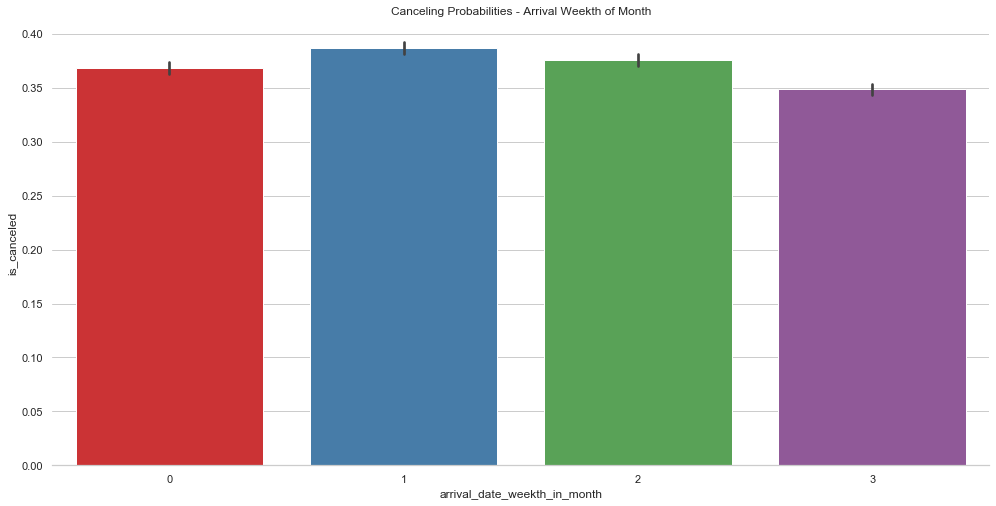

In [44]:
g = sns.catplot(x='arrival_date_weekth_in_month', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Canceling Probabilities - Arrival Weekth of Month')

-  Canceling probability is high for weeks 1st and 2nd.

In [45]:
data = pd.get_dummies(data, columns=['arrival_date_weekth_in_month'])

In [46]:
## we don't need arrival_date_week_number anymore we can remove it.

data.drop(['arrival_date_week_number'], axis=1, inplace=True)

In [47]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status,reservation_status_date,lead_time_hour,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,arrival_date_weekth_in_month_0,arrival_date_weekth_in_month_1,arrival_date_weekth_in_month_2,arrival_date_weekth_in_month_3
0,Resort Hotel,0,342,July,1,0,0,2,0.0,0,...,Check-Out,2015-07-01,5,1,0,0,0,0,0,1
1,Resort Hotel,0,737,July,1,0,0,2,0.0,0,...,Check-Out,2015-07-01,12,1,0,0,0,0,0,1
2,Resort Hotel,0,7,July,1,0,1,1,0.0,0,...,Check-Out,2015-07-02,0,1,0,0,0,0,0,1
3,Resort Hotel,0,13,July,1,0,1,1,0.0,0,...,Check-Out,2015-07-02,0,1,0,0,0,0,0,1
4,Resort Hotel,0,14,July,1,0,2,2,0.0,0,...,Check-Out,2015-07-03,0,1,0,0,0,0,0,1


### 5 - arrival_date_month:

In [48]:
data['arrival_date_month'].isna().sum()

0

In [49]:
data['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

In [50]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

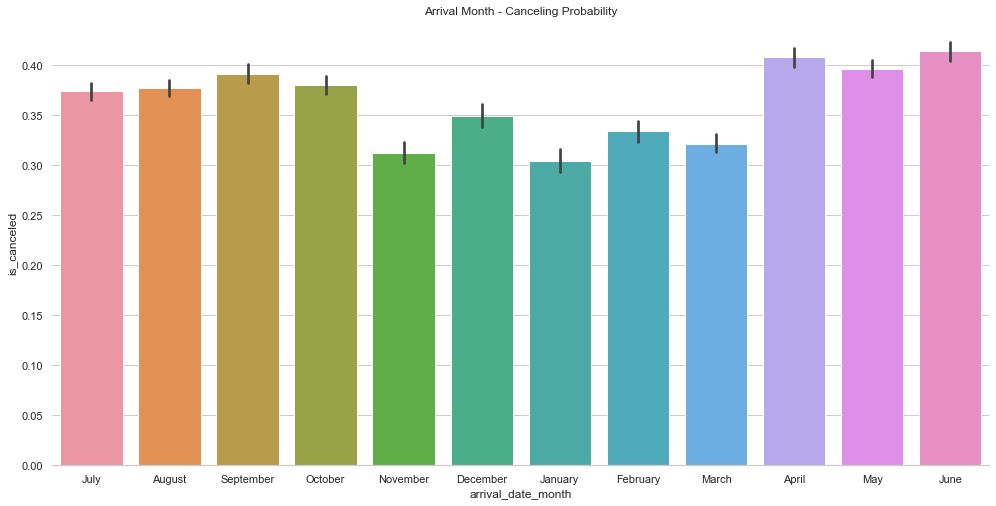

In [51]:
g = sns.catplot(x='arrival_date_month', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Month - Canceling Probability')

- We have higher canceling probabilities for summer.

In [52]:
# we may try to generate season data.

In [53]:
def month_to_season(month):
    
    if month in ['June', 'July', 'August']:
        return "summer"
    elif month in ['March', 'April', 'May']:
        return "spring"
    elif month in ['October', 'November', 'September']:
        return "autumn"
    else:
        return "winter"

In [54]:
data['seasons'] = data['arrival_date_month'].apply(month_to_season)

In [55]:
data['seasons'].value_counts()

summer    37477
spring    32674
autumn    28462
winter    20777
Name: seasons, dtype: int64

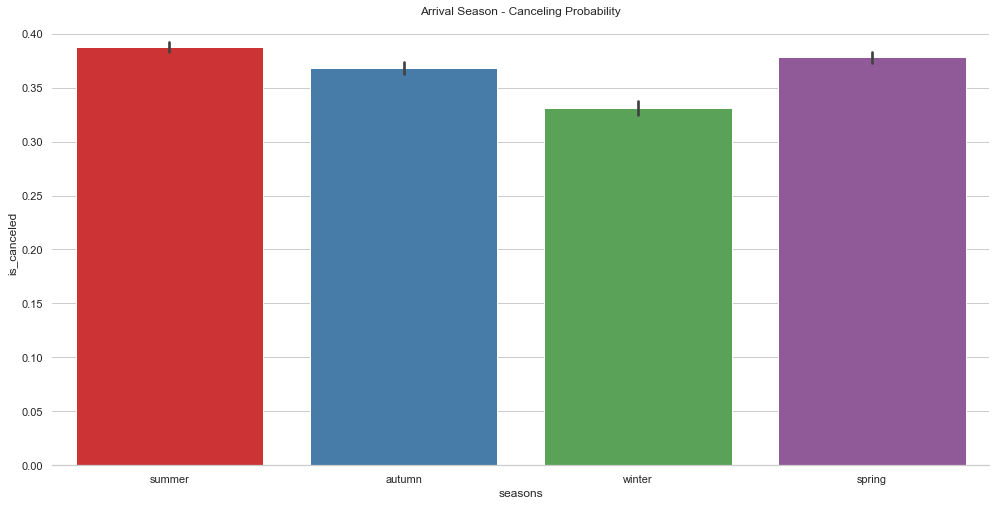

In [56]:
g = sns.catplot(x='seasons', y='is_canceled', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Season - Canceling Probability')

- Lowest Cancel Probability is for winter season. 

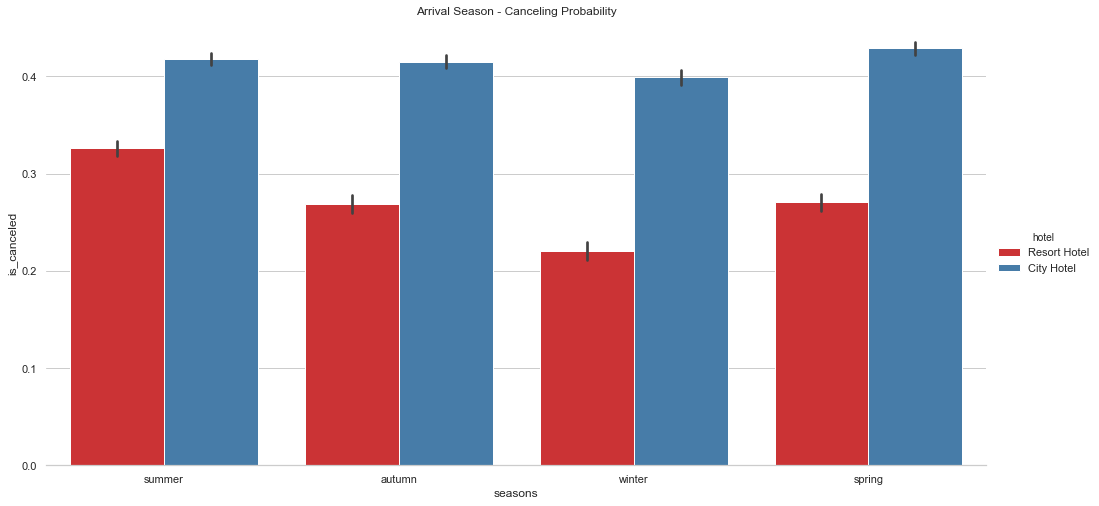

In [57]:
g = sns.catplot(x='seasons', y='is_canceled', hue='hotel', data=data, kind='bar', height=7, aspect=2)

g.despine(left=True)

g.set(title='Arrival Season - Canceling Probability')

In [58]:
data.groupby(['hotel', 'seasons'])['is_canceled'].value_counts(normalize=True)

hotel         seasons  is_canceled
City Hotel    autumn   0              0.584805
                       1              0.415195
              spring   0              0.571313
                       1              0.428687
              summer   0              0.581975
                       1              0.418025
              winter   0              0.600795
                       1              0.399205
Resort Hotel  autumn   0              0.731319
                       1              0.268681
              spring   0              0.729056
                       1              0.270944
              summer   0              0.673913
                       1              0.326087
              winter   0              0.779582
                       1              0.220418
Name: is_canceled, dtype: float64

In [59]:
data = pd.get_dummies(data, columns=['seasons', 'arrival_date_month'])

In [60]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,Resort Hotel,0,342,1,0,0,2,0.0,0,BB,...,0,0,0,1,0,0,0,0,0,0
1,Resort Hotel,0,737,1,0,0,2,0.0,0,BB,...,0,0,0,1,0,0,0,0,0,0
2,Resort Hotel,0,7,1,0,1,1,0.0,0,BB,...,0,0,0,1,0,0,0,0,0,0
3,Resort Hotel,0,13,1,0,1,1,0.0,0,BB,...,0,0,0,1,0,0,0,0,0,0
4,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,...,0,0,0,1,0,0,0,0,0,0


In [61]:
### 6 - arrival_day_of_month: